## Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()

## Loading the dataset into a pandas dataframe

In [2]:
df_power_consumption = pd.read_csv("Electric power consumption.csv")
df_population_growth = pd.read_csv("Population growth.csv")

In [3]:
df_power_consumption.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,740.741606,703.908401,698.369914,686.728057,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,175.112546,185.515814,181.128875,186.199010,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,207.013351,219.253483,280.214482,312.228894,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_population_growth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.539822,2.575182,2.606839,2.633213,2.656488,...,2.756619,2.763426,2.761496,2.750400,2.732598,2.712218,2.690902,2.665620,2.636666,2.605427
2,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,2.034308,2.085972,2.133725,2.173361,2.202845,2.226134,...,2.775171,2.763803,2.753564,2.745542,2.738332,2.730332,2.719330,2.704168,2.684152,2.660902
3,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.392891,1.383296,1.256405,0.973970,0.618450,...,3.634150,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530
4,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942


In [5]:
#Dropping the irrelevant columns

df_power_consumption = df_power_consumption.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1)
df_population_growth = df_population_growth.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1)

## Dealing with missing values

In [6]:
# To display all the values in the dataframe for our analysis
pd.set_option('display.max_rows', None)

In [7]:
#Counts and stores the number of missing values in each colunm

mv_power_consumption = np.array(df_power_consumption.isnull().sum())
mv_population_growth = np.array(df_population_growth.isnull().sum())

In [8]:
# Creating a dataframe to summarize the count of missing values in each column

mv_pc_summary = pd.DataFrame(df_power_consumption.columns.values, columns=['Column Names'])
mv_pc_summary['No of Missing Values'] = mv_power_consumption
mv_pc_summary = mv_pc_summary.set_index('Column Names')
mv_pc_summary.sort_values(by='No of Missing Values', ascending=False)

,No of Missing Values
Column Names,
2020,266
2015,265
2017,265
2018,265
2019,265
2016,265
1961,235
1962,235
1963,235


In [9]:
mv_pg_summary = pd.DataFrame(df_population_growth.columns.values, columns=['Column Names'])
mv_pg_summary['No of Missing Values'] = mv_population_growth
mv_pg_summary = mv_pg_summary.set_index('Column Names')
mv_pg_summary.sort_values(by='No of Missing Values', ascending = False)

,No of Missing Values
Column Names,
1960,261
1990,2
1993,2
1984,2
1985,2
1986,2
1987,2
1988,2
1989,2


#### Based on the number of missing values over the years in the Power Consumption dataframe, our analysis would be from year 1990 to 2014

In [10]:
#Creating a reduced dataset with the columns of interest

colnames = ['Country Name', '1990', '1991','1992', '1993', '1994', '1995', '1996', 
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
       '2013', '2014']

#Creating new dataframes with only the selected colunm names above

df_power_consumption = df_power_consumption[colnames]
df_population_growth = df_population_growth[colnames]

## Setting Missing values to zero

In [11]:
# We would set the remaining few missing values to zero
# This is not ideal, but for this assignment, that is what we would do

df_power_consumption_nmv = df_power_consumption.fillna(0)
df_population_growth_nmv = df_population_growth.fillna(0)

In [12]:
# Confirming that we no longer have any missing value

df_power_consumption_nmv.isnull().sum()
df_population_growth_nmv.isnull().sum()

Country Name    0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

In [13]:
#Checking for countries with zero record.

df_power_consumption_nmv['Power Consumption'] = df_power_consumption_nmv.iloc[: , 1:].sum(axis = 1)
df_population_growth_nmv['Population Growth'] = df_population_growth_nmv.iloc[: , 1:].sum(axis = 1)

df_power_consumption_nmv[(df_power_consumption_nmv['Power Consumption'] < 1)]

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Power Consumption
0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Burkina Faso,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,"Bahamas, The",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Deleting countries with zero record

df_power_consumption_nmv = df_power_consumption_nmv[~(df_power_consumption_nmv['Power Consumption'] < 1)]

## Checking the basic statistical properties


In [15]:
#df_power_consumption_nmv.describe()
df_population_growth_nmv.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Population Growth
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,1.814261,1.703255,1.591187,1.538656,1.491885,1.452685,1.480335,1.480923,1.433554,1.395034,...,1.503908,1.499380,1.500401,1.442896,1.385141,1.308720,1.325100,1.315810,1.292271,36.470949
std,1.371001,1.367770,1.458735,1.528131,1.456959,1.320642,1.241340,1.290076,1.438758,1.521697,...,1.736936,1.821589,1.760752,1.578098,1.436424,1.415364,1.359416,1.366949,1.287310,28.868416
min,-1.803750,-3.104610,-5.538691,-6.766133,-5.837092,-4.165327,-3.629546,-3.207518,-5.924733,-10.955149,...,-1.596378,-1.994692,-2.382134,-2.259678,-2.096943,-2.628656,-3.097273,-4.300775,-4.533415,-29.090403
25%,0.683321,0.707014,0.650693,0.590004,0.571787,0.521898,0.642638,0.528878,0.542368,0.526673,...,0.565246,0.530028,0.534077,0.506225,0.481642,0.422331,0.459271,0.478505,0.476287,17.403135
50%,1.907338,1.881091,1.721892,1.689047,1.621648,1.541824,1.521854,1.493678,1.485345,1.413535,...,1.281997,1.244542,1.293765,1.228026,1.198099,1.192832,1.174345,1.165439,1.151449,34.958783
75%,2.766068,2.699118,2.619751,2.575149,2.505348,2.486335,2.415447,2.407977,2.283480,2.332398,...,2.377004,2.357424,2.277897,2.289912,2.287108,2.264322,2.212921,2.216478,2.143492,57.336241
max,9.298752,6.017009,5.802706,6.048669,5.644930,5.127893,5.510037,7.390991,8.117946,7.448638,...,16.700200,17.512207,16.475576,14.143924,11.483371,9.231843,7.575373,7.349583,6.738894,167.512496


## Using the total historic values, we would be looking of interestig clusters

In [16]:
## Creating the dataset that would be used for clustering

#mv_pg_summary = pd.DataFrame(df_population_growth.columns.values, columns=['Column Names'])
#mv_pg_summary['No of Missing Values'] = mv_population_growth
#mv_pg_summary = mv_pg_summary.set_index('Column Names')

#countries = df_power_consumption_nmv['Country Name'].values
cluster_dataset = pd.DataFrame(df_power_consumption_nmv['Country Name'].values, columns=['Country Names'])
cluster_dataset['Power Consumption'] = df_power_consumption_nmv['Power Consumption']
cluster_dataset['Population Growth'] = df_population_growth_nmv['Population Growth']
cluster_dataset = cluster_dataset.set_index('Country Names')

In [31]:
cluster_dataset.head()

,Power Consumption,Population Growth
Country Names,,
Africa Eastern and Southern,0.000000,53.082003
Africa Western and Central,18972.771769,67.830828
Angola,0.000000,68.232893
Albania,3587.967675,85.527052
Arab World,2980.065662,-11.089867


## Dealing with missing values and Normalising the data

In [18]:
cluster_dataset = cluster_dataset.fillna(0)

In [32]:
# Normalizing the data using Z-score
scaled_cluster_dataset = cluster_dataset.copy()

for colunm in scaled_cluster_dataset.columns:
    scaled_cluster_dataset[colunm] = (scaled_cluster_dataset[colunm] - 
                                      scaled_cluster_dataset[colunm].mean()) / scaled_cluster_dataset[colunm].std()


scaled_cluster_dataset.head()

,Power Consumption,Population Growth
Country Names,,
Africa Eastern and Southern,-0.587212,0.608275
Africa Western and Central,-0.412359,1.122623
Angola,-0.587212,1.136645
Albania,-0.554145,1.739759
Arab World,-0.559748,-1.629644


## Visualising the data

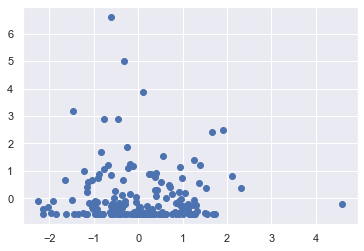

In [20]:
plt.scatter(scaled_cluster_dataset['Population Growth'],scaled_cluster_dataset['Power Consumption'])
plt.show()

## Selecting the features

In [33]:
x = scaled_cluster_dataset.iloc[:,0:3]
x.head()

,Power Consumption,Population Growth
Country Names,,
Africa Eastern and Southern,-0.587212,0.608275
Africa Western and Central,-0.412359,1.122623
Angola,-0.587212,1.136645
Albania,-0.554145,1.739759
Arab World,-0.559748,-1.629644


## Finding the optimal number of clusters using the Elbow Method

In [22]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [23]:
kmeans.inertia_

248.25187151699103

In [24]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [25]:
wcss

[370.0000000000002,
 248.2950262975441,
 143.74302497273564,
 111.99456494248604,
 85.18212049477957,
 68.74749398000714]

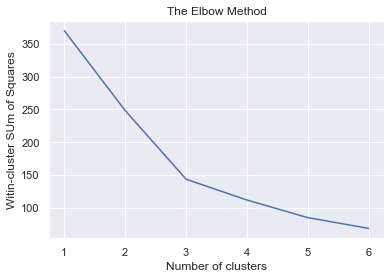

In [26]:
number_of_clusters = range(1,7)
plt.plot(number_of_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Witin-cluster SUm of Squares')
plt.show()

In [27]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 0, 1, 0])

In [29]:
data_with_clusters = cluster_dataset.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Power Consumption,Population Growth,Clusters
Country Names,,,
Africa Eastern and Southern,0.000000,53.082003,1
Africa Western and Central,18972.771769,67.830828,1
Angola,0.000000,68.232893,1
Albania,3587.967675,85.527052,1
Arab World,2980.065662,-11.089867,0
United Arab Emirates,33332.284897,41.224196,1
Argentina,0.000000,59.845699,1
Armenia,42454.073945,167.512496,1
Australia,267482.009940,28.312988,2


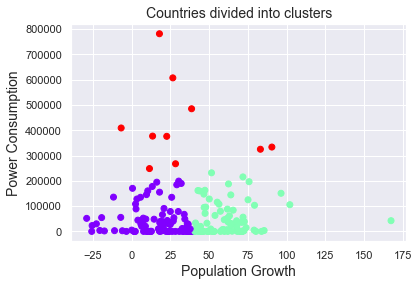

In [35]:
plt.scatter(data_with_clusters['Population Growth'],data_with_clusters['Power Consumption'],
            c=data_with_clusters['Clusters'],
           cmap='rainbow')
plt.ylabel('Power Consumption', size = 14)
plt.xlabel('Population Growth', size = 14)
plt.title('Countries divided into clusters', size = 14)
plt.show()

## Viewing the countries in each cluster

### Labeling the cluster numbers to something meaningful

In [42]:
refined_dataset = data_with_clusters.copy()

refined_dataset['Clusters'] = refined_dataset['Clusters'].map({0:'Low Population Growth',
                                                              1:'High Population Growth',
                                                              2:'High Power Consumption'})

#### Countries with Low Population Growth

In [45]:
refined_dataset[refined_dataset['Clusters'] == 'Low Population Growth'].head()

,Power Consumption,Population Growth,Clusters
Country Names,,,
Arab World,2980.065662,-11.089867,Low Population Growth
Austria,54649.728133,-19.415139,Low Population Growth
Azerbaijan,40157.995774,19.527818,Low Population Growth
Benin,0.000000,33.372959,Low Population Growth
Bulgaria,184450.211016,29.110439,Low Population Growth


#### Countries with High Population Growth

In [46]:
refined_dataset[refined_dataset['Clusters'] == 'High Population Growth'].head()

,Power Consumption,Population Growth,Clusters
Country Names,,,
Africa Eastern and Southern,0.000000,53.082003,High Population Growth
Africa Western and Central,18972.771769,67.830828,High Population Growth
Angola,0.000000,68.232893,High Population Growth
Albania,3587.967675,85.527052,High Population Growth
United Arab Emirates,33332.284897,41.224196,High Population Growth


#### Countries with High Power Consumption

In [43]:
refined_dataset[refined_dataset['Clusters'] == 'High Power Consumption']

,Power Consumption,Population Growth,Clusters
Country Names,,,
Australia,267482.009940,28.312988,High Power Consumption
Bangladesh,248477.483399,11.478545,High Power Consumption
Canada,484988.302050,38.680191,High Power Consumption
Curacao,408999.109350,-6.807941,High Power Consumption
IDA blend,376886.757740,13.496046,High Power Consumption
Middle East & North Africa (excluding high income),781610.110340,17.918930,High Power Consumption
Nepal,324935.649640,83.135127,High Power Consumption
South Asia,375984.474960,22.632062,High Power Consumption
Tunisia,333540.204230,90.541346,High Power Consumption
